In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

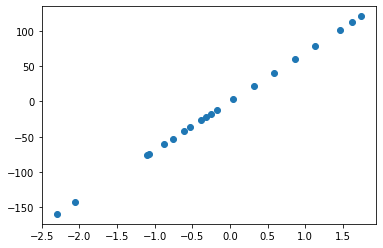

In [3]:
plt.scatter(x, y);

In [4]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0, b1):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

# 1
**Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.**

## b0 = 0, b1 = 0

In [5]:
hyp = Model(0,0)
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


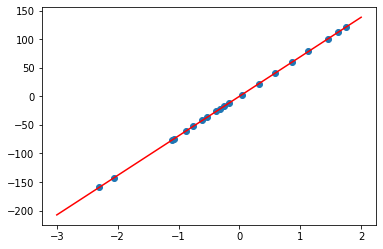

In [6]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

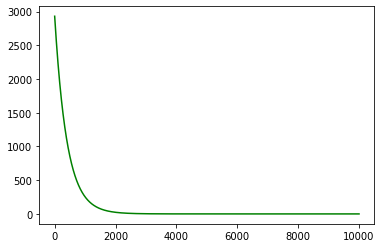

In [7]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

## b0 = 100, b1 = 100

In [8]:
hyp = Model(100,100)
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 3.5318300851469825e-05


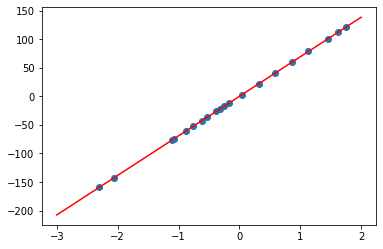

In [9]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

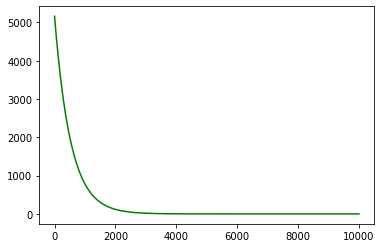

In [10]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

## b0 = 10000, b1 = 10000

In [11]:
hyp = Model(10000,10000)
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.5758520472913853


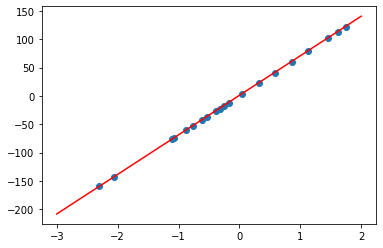

In [12]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

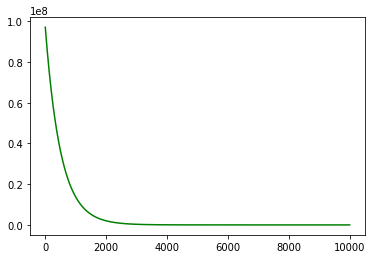

In [13]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

# 2 
**Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.**

## alpha=0.1

In [14]:
hyp = Model(0,0)
steps, errors = hyp.fit(x, y, alpha=0.1)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 1.6583631164782415e-27


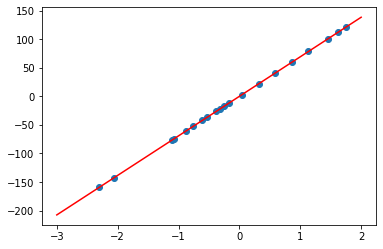

In [15]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

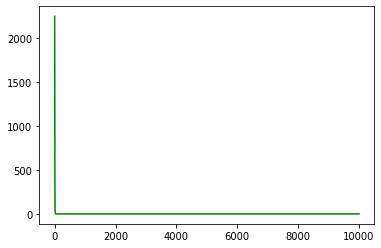

In [16]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

## alpha=1

In [17]:
hyp = Model(0,0)
steps, errors = hyp.fit(x, y, alpha=1)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 3.0967720910582346e-29


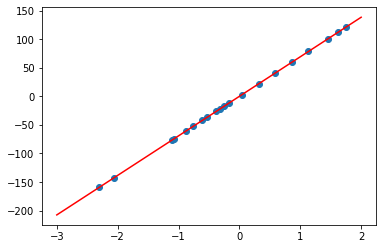

In [18]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

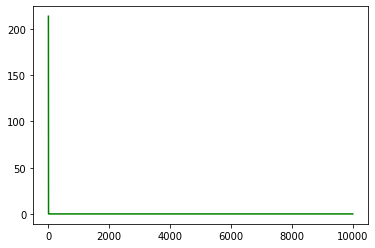

In [19]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

## alpha=1.6

In [20]:
hyp = Model(0,0)
steps, errors = hyp.fit(x, y, alpha=1.6)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: inf


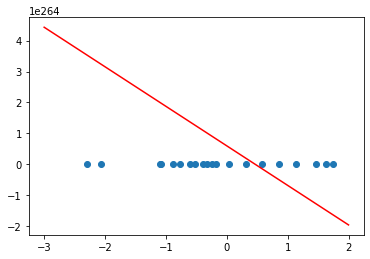

In [21]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

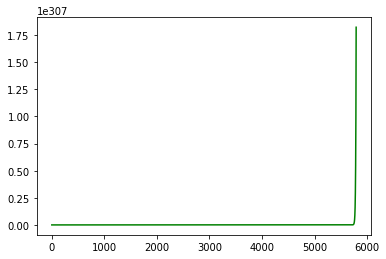

In [22]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

# 3
**Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.**

In [23]:
class Model_df(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        if len(X.shape) == 1:
            return self.b0 + self.b1 * X
        else:
            return self.b0 + self.b1 * X.iloc[:,0]
    def error(self, X, Y=None):
        if Y is None:
            Y = X.iloc[:,1]
            X = X.iloc[:,0]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y=None, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        if Y is None:
            Y = X.iloc[:,1]
            X = X.iloc[:,0]
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [24]:
hyp = Model_df()
steps, errors = hyp.fit(x, y, alpha=1)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 3.0967720910582346e-29


In [25]:
df = pd.DataFrame({'X': x,'Y': y})
df.head()

,X,Y
0,1.462108,101.159902
1,1.133769,78.442913
2,-2.301539,-159.238195
3,1.744812,120.719533
4,0.042214,2.920673


In [26]:
hyp = Model_df()
steps, errors = hyp.fit(df, alpha=1)
J = hyp.error(df)
print("error after gradient descent:", J)

error after gradient descent: 3.0967720910582346e-29


# 4
**Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливался, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.**

In [27]:
class Model_df4(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        if len(X.shape) == 1:
            return self.b0 + self.b1 * X
        else:
            return self.b0 + self.b1 * X.iloc[:,0]
    def error(self, X, Y=None):
        if Y is None:
            Y = X.iloc[:,1]
            X = X.iloc[:,0]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y=None, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], [hyp.error(X, Y)]
        step = 0        
        if Y is None:
            Y = X.iloc[:,1]
            X = X.iloc[:,0]
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if abs(errors[-1]-errors[-2]) < accuracy:
                break
        return steps, errors

In [28]:
hyp = Model_df4()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 4.4961047667431675


In [29]:
hyp = Model_df4()
steps, errors = hyp.fit(x, y, accuracy=0.000001)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.0005244076717215663


# 5
**Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.**

In [30]:
class Model_df5(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        if len(X.shape) == 1:
            return self.b0 + self.b1 * X
        else:
            return self.b0 + self.b1 * X.iloc[:,0]
    def error(self, X, Y=None):
        if Y is None:
            Y = X.iloc[:,1]
            X = X.iloc[:,0]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y=None, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], [hyp.error(X, Y)]
        step = 0        
        if Y is None:
            Y = X.iloc[:,1]
            X = X.iloc[:,0]
        for _ in range(max_steps): # алгоритм сделает не больше max_steps итераций
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if abs(errors[-1]-errors[-2]) < accuracy:
                break
        return steps, errors

In [31]:
hyp = Model_df5()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 4.4961047667431675


In [32]:
hyp = Model_df5()
steps, errors = hyp.fit(x, y, max_steps=50)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2594.561288363529


# 6
**Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.**

In [33]:
class Model_df6(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        if len(X.shape) == 1:
            return self.b0 + self.b1 * X
        else:
            return self.b0 + self.b1 * X.iloc[:,0]
    def error(self, X, Y=None):
        if Y is None:
            Y = X.iloc[:,1]
            X = X.iloc[:,0]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y=None, alpha=1, accuracy=0.01, max_steps=5000):
        steps, errors = [], [hyp.error(X, Y)]
        step = 0        
        if Y is None:
            Y = X.iloc[:,1]
            X = X.iloc[:,0]
        fl = 0
        while step < max_steps: 
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            if fl == 0:
                if new_err >= errors[-1]:
                    self.b0 += alpha * dJ0
                    self.b1 += alpha * dJ1   
                    alpha /= 2
                    continue
                else:
                    fl = 1
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if abs(errors[-1]-errors[-2]) < accuracy:
                break
        return steps, errors

In [34]:
hyp = Model_df5() # в первоначальной модели алгоритм расходится при alpha=4
steps1, errors1 = hyp.fit(x, y, alpha=4, accuracy=0, max_steps=10000)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: nan


In [35]:
hyp = Model_df6() # алгоритм сходится при alpha=4
steps2, errors2 = hyp.fit(x, y, alpha=4, accuracy=0, max_steps=10000)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 3.0967720910582346e-29


In [36]:
hyp = Model_df5() # первоначальная модель дает такой же результат при alpha=1
steps3, errors3 = hyp.fit(x, y, alpha=1, accuracy=0, max_steps=10000)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 3.0967720910582346e-29


In [37]:
(steps2 == steps3) and (errors2 == errors3) # новый алгоритм доходит делением на 2 до alpha=1 
                                            # (т.к. при alpha=2, алгоритм расходится, 
                                            # а при alpha=1 - уже сходится)

True

# 7
**Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.**

In [77]:
class Model_df7(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        if len(X.shape) == 1:
            return self.b0 + self.b1 * X
        else:
            return self.b0 + self.b1 * X.iloc[:,0]
    def error(self, X, Y=None):
        if Y is None:
            Y = X.iloc[:,1]
            X = X.iloc[:,0]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y=None, alpha=1, accuracy=0.01, max_steps=5000):
        steps, errors = [], [hyp.error(X, Y)]
        step = 0        
        if Y is None:
            Y = X.iloc[:,1]
            X = X.iloc[:,0]
        fl = 0
        while step < max_steps: 
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            if fl == 0:
                if new_err >= errors[-1]:
                    self.b0 += alpha * dJ0
                    self.b1 += alpha * dJ1   
                    alpha /= 2
                    continue
                else:
                    fl = 1
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if abs(errors[-1]-errors[-2]) < accuracy:
                break
        return steps, errors
    def vis(self, X, Y=None):
        if Y is None:
            Y = X.iloc[:,1]
            X = X.iloc[:,0]
        
        x1 = (X-X.min()) / (X.max()-X.min())
        y1 = (Y-Y.min()) / (Y.max()-Y.min())

        X0 = np.linspace(0, 1, 100)
        Y0 = self.predict(X0)
        Y0 = (Y0-Y0.min()) / (Y0.max()-Y0.min())

        plt.figure()
        plt.scatter(x1, y1)
        plt.plot(X0, Y0, 'r')
        plt.show()

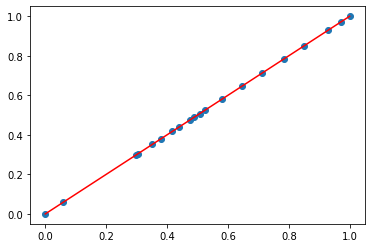

In [78]:
hyp = Model_df7()
hyp.fit(x, y, alpha=1.6)
hyp.vis(x,y)

Сравним с визуализацией, зависящей от масштаба данных:

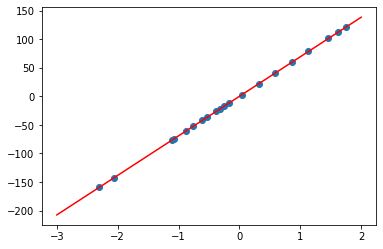

In [79]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Рисунки одинаковы